CAPM Note: 2021/12/13

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

factor = pdr.data.DataReader('F-F_Research_Data_Factors', 'famafrench', start='1-1-1926')[0]
data = pdr.data.DataReader('Portfolios_Formed_on_BETA', 'famafrench', start='1-1-1926')


---

In [3]:
egg = pdr.data.DataReader('F-F_Research_Data_Factors', 'famafrench', start='1-1-1926')

In [4]:
print(type(egg))
print(len(egg))

<class 'dict'>
3


In [5]:
v = [x for x in egg.items()]
print(v[0])
v[2]

(0,          Mkt-RF   SMB   HML    RF
Date                             
1926-07    2.96 -2.38 -2.73  0.22
1926-08    2.64 -1.47  4.14  0.25
1926-09    0.36 -1.39  0.12  0.23
1926-10   -3.24 -0.13  0.65  0.32
1926-11    2.53 -0.16 -0.38  0.31
...         ...   ...   ...   ...
2021-06    2.75  1.80 -7.76  0.00
2021-07    1.27 -3.96 -1.75  0.00
2021-08    2.90 -0.48 -0.13  0.00
2021-09   -4.37  0.80  5.09  0.00
2021-10    6.65 -2.28 -0.45  0.00

[1144 rows x 4 columns])


('DESCR',
 'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 202110 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2021 Kenneth R. French\n\n  0 : (1144 rows x 4 cols)\n  1 : Annual Factors: January-December (94 rows x 4 cols)')

所以 ```factor``` 內存放的是 市場超額報酬、risk-free rate

In [6]:
egg2 = pdr.data.DataReader('Portfolios_Formed_on_BETA', 'famafrench', start='1-1-1926')
type(egg2)

dict

In [7]:
v = [x for x in egg2.items()]

print(v[7])

('DESCR', 'Portfolios Formed on BETA\n-------------------------\n\nThis file was created by CMPT_BETA_RETS using the 202110 CRSP database. It contains value- and equal-weighted returns for portfolios formed on BETA. The portfolios are constructed at the end of June. Beta is estimated using monthly returns for the past 60 months (requiring at least 24 months with non-missing returns). Beta is estimated using the Scholes-Williams method. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2021 Kenneth R. French\n\n  0 : Value Weighted Returns -- Monthly (700 rows x 15 cols)\n  1 : Equal Weighted Returns -- Monthly (700 rows x 15 cols)\n  2 : Value Weighted Returns -- Annual from January to December (57 rows x 15 cols)\n  3 : Equal Weighted Returns -- Annual from January to December (57 rows x 15 cols)\n  4 : Number of Firms i

In [8]:
v[0] # 這些是 return 的資料??

(0,
          Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  Dec 2  Dec 3  Dec 4  Dec 5  \
 Date                                                                            
 1963-07   1.14  -0.10  -0.93  -0.93  -1.41   1.36   0.75   0.09  -0.29  -0.59   
 1963-08   3.66   4.77   6.34   6.37   9.69   3.52   3.90   4.30   5.26   5.20   
 1963-09  -2.78  -0.76  -0.71  -0.91  -2.73  -3.10  -2.24  -0.57  -0.96  -1.33   
 1963-10   0.74   3.57   2.08   5.76   3.06   1.24  -0.13   1.99   5.16   2.35   
 1963-11  -0.63  -0.24  -0.91  -0.82   0.13  -0.91  -0.15   1.59  -2.05  -1.00   
 ...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 2021-06   0.08   3.40   3.13   2.08   4.55   0.56  -0.28   4.35   2.29   0.01   
 2021-07   1.78   3.38  -0.16   1.69  -4.07   2.74   1.28   3.26   3.51   0.08   
 2021-08   2.03   3.63   0.74   4.21   4.31   2.15   1.97   3.11   4.22   0.92   
 2021-09  -4.44  -5.94  -2.58  -3.94  -1.40  -4.58  -4.37  -5.11  -6.87  -2.58   
 2021-10   4

---

所以我們知道 factor 存放之後迴歸會用到的資料 (risk-free rate, 市場超額報酬等)  
data 則是放 estimated 的 beta (FF 自己算的??)

In [9]:
df = data[0] # return 的資料
start = '1926'
finish = '2021'

df = df.loc[start:finish,"Lo 10":"Hi 10"] # 只需要每 10 百分位數切割的資料
df = df.join(factor[['Mkt-RF','RF']])
df.head()


,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Mkt-RF,RF
Date,,,,,,,,,,,,
1963-07,1.36,0.75,0.09,-0.29,-0.59,-1.22,-0.42,-1.39,-1.91,-0.82,-0.39,0.27
1963-08,3.52,3.90,4.30,5.26,5.20,7.34,7.94,4.91,9.04,10.44,5.07,0.25
1963-09,-3.10,-2.24,-0.57,-0.96,-1.33,-0.17,-0.81,-1.00,-1.85,-3.73,-1.57,0.27
1963-10,1.24,-0.13,1.99,5.16,2.35,1.86,6.81,4.78,3.12,2.98,2.53,0.29
1963-11,-0.91,-0.15,1.59,-2.05,-1.00,-0.84,-1.14,-0.51,-0.21,0.52,-0.85,0.27


## Linear Regression

In [10]:
df.columns

Index(['Lo 10', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7', 'Dec 8',
       'Dec 9', 'Hi 10', 'Mkt-RF', 'RF'],
      dtype='object')

In [11]:
import statsmodels.formula.api as smf
Y = df['Hi 10'] - df['RF'] # 被解釋變數
X = df['Mkt-RF'] # 解釋變數

reg_df = pd.DataFrame([Y, X], index=['R', 'MKT']).T

In [12]:
print(type(Y)) # 把 data frame 的兩 columns 相減，就變成一個 series
Y.head()

<class 'pandas.core.series.Series'>


Date
1963-07    -1.09
1963-08    10.19
1963-09    -4.00
1963-10     2.69
1963-11     0.25
Freq: M, dtype: float64

In [13]:
reg_df = pd.DataFrame([Y, X], index=['R', 'MKT'])
reg_df

Date,1963-07,1963-08,1963-09,1963-10,1963-11,1963-12,1964-01,1964-02,1964-03,1964-04,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
R,-1.09,10.19,-4.00,2.69,0.25,0.91,0.65,3.55,5.78,-5.3,...,5.58,6.56,-4.23,4.33,-3.18,8.40,-9.18,5.38,-3.70,5.84
MKT,-0.39,5.07,-1.57,2.53,-0.85,1.83,2.24,1.54,1.41,0.1,...,-0.03,2.78,3.08,4.93,0.29,2.75,1.27,2.90,-4.37,6.65


In [14]:
reg_df = reg_df.T # Y, X 結合會以上下交疊方式，即 columns 為時間，因此轉置讓時間變成 rows
reg_df

,R,MKT
Date,,
1963-07,-1.09,-0.39
1963-08,10.19,5.07
1963-09,-4.00,-1.57
1963-10,2.69,2.53
1963-11,0.25,-0.85
...,...,...
2021-06,8.40,2.75
2021-07,-9.18,1.27
2021-08,5.38,2.90


In [15]:
TSR = smf.ols('R ~ 1 + MKT', data=reg_df).fit() # TSR = time series regression
YHat = TSR.fittedvalues
print(TSR.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2969.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.19e-253
Time:                        21:15:33   Log-Likelihood:                -1858.0
No. Observations:                 700   AIC:                             3720.
Df Residuals:                     698   BIC:                             3729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1910      0.131     -1.454      0.1

In [16]:
Y # Y = excess return = market return - risk-free rate

Date
1963-07    -1.09
1963-08    10.19
1963-09    -4.00
1963-10     2.69
1963-11     0.25
           ...  
2021-06     8.40
2021-07    -9.18
2021-08     5.38
2021-09    -3.70
2021-10     5.84
Freq: M, Length: 700, dtype: float64

In [17]:
YHat # 迴歸式估出的

Date
1963-07    -0.812788
1963-08     7.892671
1963-09    -2.694188
1963-10     3.842878
1963-11    -1.546215
             ...    
2021-06     4.193648
2021-07     1.833926
2021-08     4.432809
2021-09    -7.158526
2021-10    10.411833
Freq: M, Length: 700, dtype: float64

## 視覺化用 F-F datasets 估出的 CAPM

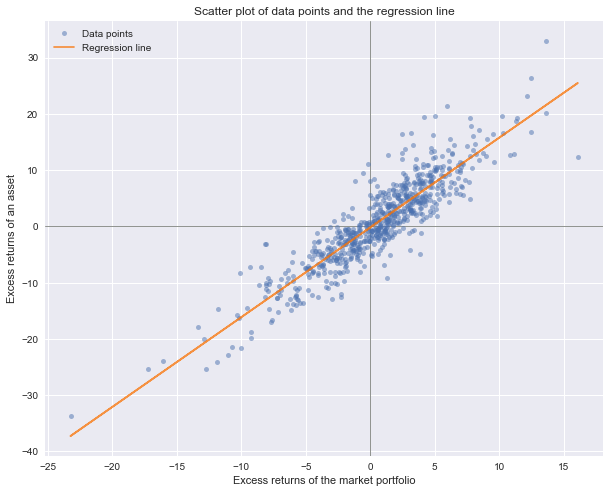

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

# 在 y = 0 的位置加一條 水平線 (horizontal line)
plt.axhline(0, color='xkcd:gray', linestyle='-', label='_nolegend_', linewidth=1)
# 在 x = 0 的位置加一條 垂直線 (vertical line)
plt.axvline(0, color='xkcd:gray', linestyle='-', label='_nolegend_', linewidth=1)

plt.plot(X,Y,'o', alpha=0.5, markersize=5)
plt.plot(X,YHat, color='xkcd:orange', alpha=0.75)

plt.ylabel('Excess returns of an asset')
plt.xlabel('Excess returns of the market portfolio')
plt.title('Scatter plot of data points and the regression line')
plt.legend(['Data points', 'Regression line'], loc='best')
plt.show()

### 對全市場的標的迴歸:
- 用全市場的平均 return 

In [19]:
import statsmodels.api as sm
MKT = df['Mkt-RF']
RF = df['RF']

AvgMkt = MKT.mean()
AvgRF = RF.mean()

In [20]:
print(type(MKT)) 
MKT # 存放各年分月份的報酬

<class 'pandas.core.series.Series'>


Date
1963-07   -0.39
1963-08    5.07
1963-09   -1.57
1963-10    2.53
1963-11   -0.85
           ... 
2021-06    2.75
2021-07    1.27
2021-08    2.90
2021-09   -4.37
2021-10    6.65
Freq: M, Name: Mkt-RF, Length: 700, dtype: float64

In [21]:
AvgMkt

0.5887

In [22]:
AvgRF # 各時間 risk-free rate 的平均

0.3672

In [23]:
BETA = []
AvgR = [] # 放市場平均的 excess return (市場平均 return (AvgMkt) - 市場平均 risk-free (AvgRF))
AvgRHat = [] # 放 迴歸線估計值

In [24]:
df

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Mkt-RF,RF
Date,,,,,,,,,,,,
1963-07,1.36,0.75,0.09,-0.29,-0.59,-1.22,-0.42,-1.39,-1.91,-0.82,-0.39,0.27
1963-08,3.52,3.90,4.30,5.26,5.20,7.34,7.94,4.91,9.04,10.44,5.07,0.25
1963-09,-3.10,-2.24,-0.57,-0.96,-1.33,-0.17,-0.81,-1.00,-1.85,-3.73,-1.57,0.27
1963-10,1.24,-0.13,1.99,5.16,2.35,1.86,6.81,4.78,3.12,2.98,2.53,0.29
1963-11,-0.91,-0.15,1.59,-2.05,-1.00,-0.84,-1.14,-0.51,-0.21,0.52,-0.85,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06,0.56,-0.28,4.35,2.29,0.01,4.92,4.35,-0.30,1.99,8.40,2.75,0.00
2021-07,2.74,1.28,3.26,3.51,0.08,-0.39,3.10,-2.64,-1.80,-9.18,1.27,0.00
2021-08,2.15,1.97,3.11,4.22,0.92,0.56,4.73,2.50,3.87,5.38,2.90,0.00


In [35]:
for c in range(10): # 因為 df 將全部資料以 10 個百分位呈現
    R = df.iloc[:, c].subtract(RF, axis=0) # axis=0: column 對 column 相減
    TSR = sm.OLS(R, sm.add_constant(MKT)).fit()
    print(type(TSR.params))
    if c==1: # 查看 params 是甚麼
        print(type(TSR.params))
        print(TSR.params)

    BETA.append(TSR.params[1]) # 將模型預估的 beta 加入 BETA list 裡
 
    AvgR.append(R.mean()) # 個股超額報酬
    AvgRHat.append(AvgMkt * TSR.params[1]) # 市場超額報酬 * 模型預估的 beta


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
const     0.115454
Mkt-RF    0.730210
dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [36]:
for i in range(1):
    print(len(BETA))
    print(len(AvgR))
    print(len(AvgRHat))

40
40
40


In [32]:
MKT

Date
1963-07   -0.39
1963-08    5.07
1963-09   -1.57
1963-10    2.53
1963-11   -0.85
           ... 
2021-06    2.75
2021-07    1.27
2021-08    2.90
2021-09   -4.37
2021-10    6.65
Freq: M, Name: Mkt-RF, Length: 700, dtype: float64

##  Empirical security market line (Regression 後再 regress 一次)

Once we have all the estimated betas, we can estimate the ```empirical security market line (SML)```
as implied by the historical data.   

To do so, we have to **regress the average excess returns $\bar{R_i}$ of these portfolios on their respective estimated betas $\hat\beta_{i}$**.  

This is also known as the cross-sectional regression (CSR):
$$
\bar{R_i} = \gamma + \hat\beta_{i}\lambda + e
$$
The estimated $\lambda$ is the price of risk (risk premium) of the CAPM beta (就是承擔多少單位的 beta 風險??)and it is the slope of the
empirical SML.

In [26]:
CSR = sm.OLS(AvgR, sm.add_constant(BETA)).fit()

## 將 empirical SML 與預估的 CAPM 畫出

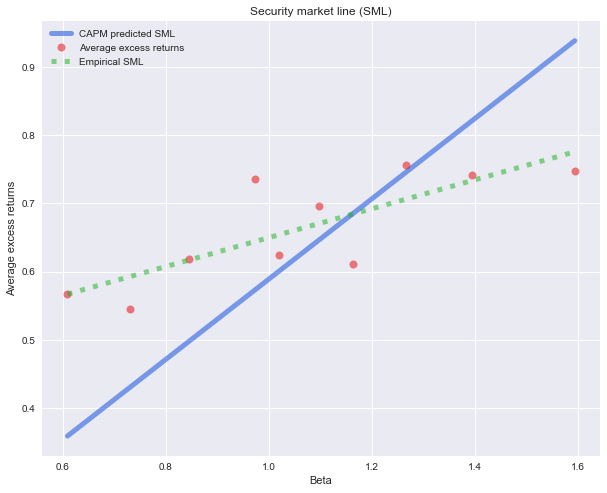

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

# 藍線放模型預估的 SML
plt.plot(BETA, AvgRHat, color='xkcd:blue', linewidth=5, alpha=0.5)
# 紅線放真實資料 (excess return)
plt.plot(BETA, AvgR, 'o', color='xkcd:red', alpha=0.5, markersize=8)
# 綠線是用真實資料得出的 SML
plt.plot(BETA, CSR.fittedvalues, ':', color='xkcd:green', alpha=0.5, linewidth=5)

# recall 筆記
plt.ylabel('Average excess returns')
plt.xlabel('Beta')

plt.title('Security market line (SML)')
plt.legend(['CAPM predicted SML', 'Average excess returns', 'Empirical SML'], loc='best')
plt.show()